In [32]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import os
from tensorflow.keras.preprocessing import image

In [33]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Define paths to the dataset
train_data_dir = '/content/Image Classification with CNNs/Image Classification with CNNs/chihuahua-muffin_trainingset'
validation_data_dir = '/content/Image Classification with CNNs/Image Classification with CNNs/chihuahua-muffin_testset'

In [35]:
# Image Data Generator for Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [36]:
# Load the dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 26 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [37]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [38]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6154 - loss: 0.6864 - val_accuracy: 0.5000 - val_loss: 1.8823
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 1.9615 - val_accuracy: 0.5000 - val_loss: 1.6718
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.7324 - val_accuracy: 0.5000 - val_loss: 1.0156
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.0189 - val_accuracy: 0.8571 - val_loss: 0.6520
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7692 - loss: 0.6441 - val_accuracy: 0.5000 - val_loss: 0.7235
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7485 - val_accuracy: 0.5000 - val_loss: 0.6515
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6545 - val_accuracy: 0.5000 - val_loss: 0.6264
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5769 - loss: 0.6564 - val_accuracy: 0.7857 - val_loss: 0.6193
Epoch 9/10
1/1 ━

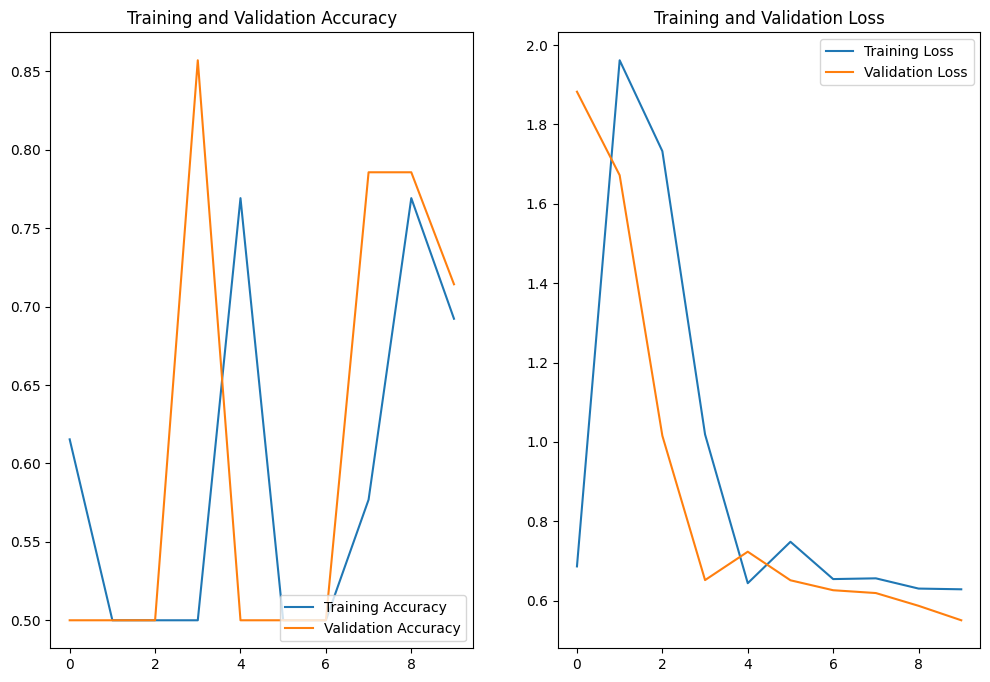

In [40]:
# Plotting the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow import keras

# Load the model
model = keras.models.load_model('/content/drive/MyDrive/Image_Classification_with_CNNs/chihuahua_muffin_classifier.h5')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prediction function with image display
def predict_image(image_path):
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array_exp)

    # Show image
    plt.imshow(img)

    plt.axis('off')

    # Title based on prediction
    if prediction < 0.5:
        plt.title("Prediction: Chihuahua 🐶")
        print("It's a Chihuahua!")
    else:
        plt.title("Prediction: Muffin 🧁")
        print("It's a Muffin!")

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
It's a Chihuahua!


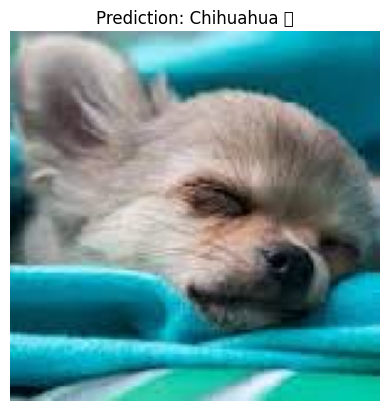

In [42]:
predict_image('/content/Image Classification with CNNs/Image Classification with CNNs/chihuahua-muffin_testset/Chihuahua/chihuahua_unseen_2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
It's a Muffin!


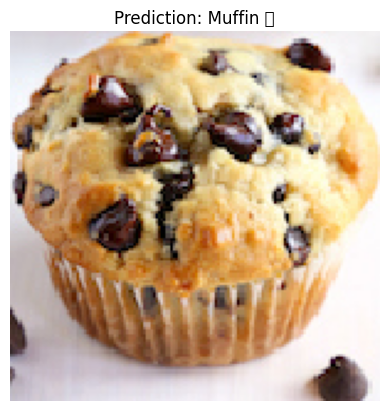

In [43]:
predict_image('/content/Image Classification with CNNs/Image Classification with CNNs/chihuahua-muffin_testset/muffin/muffin_unseen_1.jpg')